In [1]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
titanic_df = pd.read_csv('dataset/titanic.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Clean numerical values

#### Fill missing for Age

In [3]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
titanic_df["Age"].fillna(titanic_df["Age"].mean(), inplace=True)
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


#### Combine SibSp and Parch to Family Count

<Figure size 640x480 with 0 Axes>

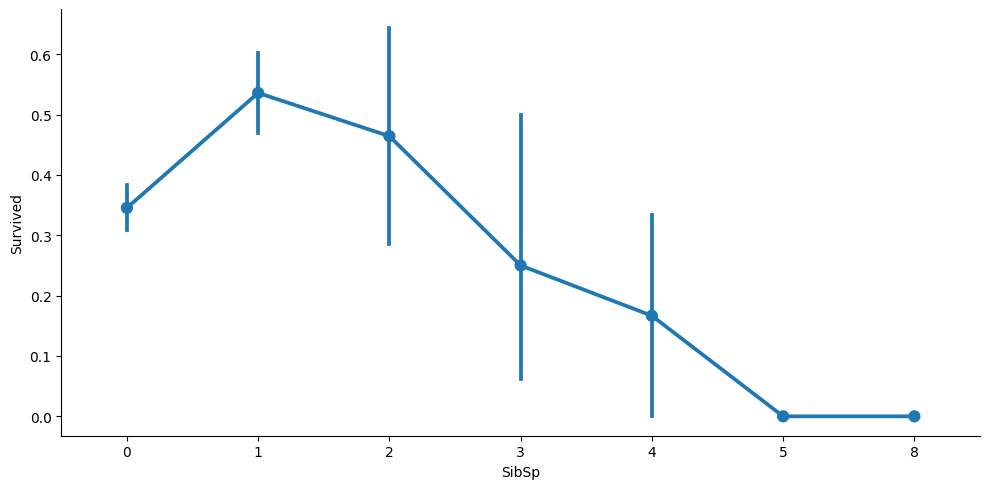

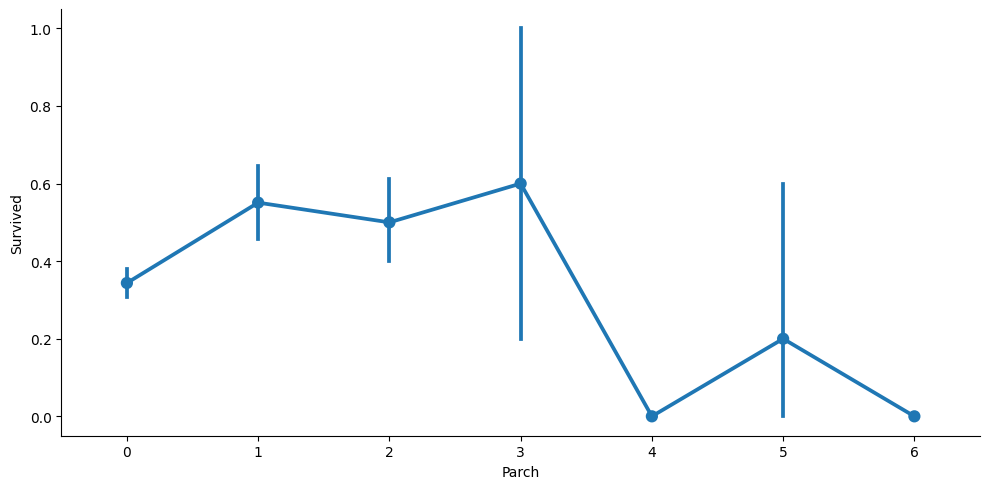

In [5]:
for i, col in enumerate(['SibSp', 'Parch']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=titanic_df, kind='point', aspect=2, )

In [6]:
titanic_df['FamilyCount'] = titanic_df['SibSp'] + titanic_df['Parch']
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


#### Drop unnecessary columns

In [7]:
titanic_df.drop(['SibSp', 'Parch', 'PassengerId'], axis=1, inplace=True)
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilyCount
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


## Clean categorical values

#### Fill missing for Cabin

In [8]:
titanic_df.groupby(titanic_df["Cabin"].isnull())["Survived"].mean()

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [9]:
titanic_df["Cabin_Indicator"] = np.where(titanic_df["Cabin"].isnull(), 0, 1)
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilyCount,Cabin_Indicator
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0,0


#### Convert Sex to numeric

In [10]:
gender_num = {
    "male": 0,
    "female": 1
}

titanic_df["Sex"] = titanic_df["Sex"].map(gender_num)
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilyCount,Cabin_Indicator
0,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,S,0,0


#### Drop unneccessary columns

In [11]:
titanic_df.drop(["Cabin", "Embarked", "Name", "Ticket"], axis=1, inplace=True)
titanic_df.head()

,Survived,Pclass,Sex,Age,Fare,FamilyCount,Cabin_Indicator
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


In [12]:
titanic_df.to_csv("dataset/titanic_cleaned.csv", index=False)

## Splitting Data

In [13]:
features = titanic_df.drop("Survived", axis=1)
labels = titanic_df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=14)
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=0.5, random_state=14)

for dataset in [y_train, y_test, y_val]:
    print(round(len(dataset) / len(labels), 2))


0.6
0.2
0.2


In [14]:
X_train.to_csv("dataset/train_features.csv", index=False)
X_test.to_csv("dataset/test_features.csv", index=False)
X_val.to_csv("dataset/val_features.csv", index=False)

y_train.to_csv("dataset/train_labels.csv", index=False)
y_test.to_csv("dataset/test_labels.csv", index=False)
y_val.to_csv("dataset/val_labels.csv", index=False)

## Algorithms

#### Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

train_features = pd.read_csv("dataset/train_features.csv")
train_labels = pd.read_csv("dataset/train_labels.csv", header=None)[:-1]

In [16]:
def print_results(results):
    print("BEST PARAMS: {}\n".format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print("{} (+/-{}) for {}".format(round(mean, 3), round(std * 2, 3), params))

In [17]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [18]:
lr = LogisticRegression()
parameters = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cv = GridSearchCV(lr, parameters, cv=3)
cv.fit(train_features, train_labels.values.ravel())
print_results(cv)

BEST PARAMS: {'C': 10}

0.624 (+/-0.0) for {'C': 0.001}
0.624 (+/-0.0) for {'C': 0.01}
0.624 (+/-0.0) for {'C': 0.1}
0.62 (+/-0.011) for {'C': 1}
0.625 (+/-0.005) for {'C': 10}
0.618 (+/-0.024) for {'C': 100}
0.62 (+/-0.019) for {'C': 1000}


/Users/abdullah/Code/ml/applied_algo_li/venv_algo/lib/python3.8/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/Users/abdullah/Code/ml/applied_algo_li/venv_algo/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/abdullah/Code/ml/applied_algo_li/venv_algo/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

In

In [19]:
joblib.dump(cv.best_estimator_, "models/logistic_regression.pkl")

['models/logistic_regression.pkl']

#### Support Vector Machines

In [20]:
from sklearn.svm import SVC

SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [21]:
svc = SVC()
parameters = {
    "kernel": ["linear", "rbf"],
    "C": [0.1, 1, 10]
}

cv = GridSearchCV(svc, parameters, cv=3)
cv.fit(train_features, train_labels.values.ravel())
print_results(cv)

/Users/abdullah/Code/ml/applied_algo_li/venv_algo/lib/python3.8/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


BEST PARAMS: {'C': 10, 'kernel': 'rbf'}

0.624 (+/-0.0) for {'C': 0.1, 'kernel': 'linear'}
0.624 (+/-0.0) for {'C': 0.1, 'kernel': 'rbf'}
0.624 (+/-0.0) for {'C': 1, 'kernel': 'linear'}
0.625 (+/-0.005) for {'C': 1, 'kernel': 'rbf'}
0.624 (+/-0.0) for {'C': 10, 'kernel': 'linear'}
0.631 (+/-0.005) for {'C': 10, 'kernel': 'rbf'}


In [22]:
joblib.dump(cv.best_estimator_, "models/svm.pkl")

['models/svm.pkl']

#### Multi Layer Perceptron

In [23]:
from sklearn.neural_network import MLPClassifier, MLPRegressor

print(MLPClassifier().get_params())
print(MLPRegressor().get_params())

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


In [24]:
mlp = MLPClassifier()
parameters = {
    "hidden_layer_sizes": [(10,), (50,), (100,), ],
    "activation": ["logistic", "tanh", "relu"],
    "learning_rate": ["constant", "invscaling", "adaptive"]
}

cv = GridSearchCV(mlp, parameters, cv=3)
cv.fit(train_features, train_labels.values.ravel())
print_results(cv)

/Users/abdullah/Code/ml/applied_algo_li/venv_algo/lib/python3.8/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/Users/abdullah/Code/ml/applied_algo_li/venv_algo/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/abdullah/Code/ml/applied_algo_li/venv_algo/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/abdullah/Code/ml/applied_algo_li/venv_algo/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't co

BEST PARAMS: {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}

0.624 (+/-0.0) for {'activation': 'logistic', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
0.624 (+/-0.0) for {'activation': 'logistic', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}
0.624 (+/-0.0) for {'activation': 'logistic', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}
0.622 (+/-0.014) for {'activation': 'logistic', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
0.624 (+/-0.009) for {'activation': 'logistic', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}
0.622 (+/-0.005) for {'activation': 'logistic', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}
0.624 (+/-0.009) for {'activation': 'logistic', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
0.624 (+/-0.016) for {'activation': 'logistic', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}
0.618 (+/-0.016) for {'activation': 'logistic', 'hidd

/Users/abdullah/Code/ml/applied_algo_li/venv_algo/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [25]:
joblib.dump(cv.best_estimator_, "models/mlp.pkl")

['models/mlp.pkl']

#### Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

print(RandomForestClassifier().get_params())
print(RandomForestRegressor().get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [27]:
rf_clf = RandomForestClassifier()
parameters = {
    "n_estimators": [5, 50, 250],
    "max_depth": [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf_clf, parameters, cv=3)
cv.fit(train_features, train_labels.values.ravel())
print_results(cv)

/Users/abdullah/Code/ml/applied_algo_li/venv_algo/lib/python3.8/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


BEST PARAMS: {'max_depth': 2, 'n_estimators': 50}

0.622 (+/-0.011) for {'max_depth': 2, 'n_estimators': 5}
0.624 (+/-0.0) for {'max_depth': 2, 'n_estimators': 50}
0.624 (+/-0.0) for {'max_depth': 2, 'n_estimators': 250}
0.614 (+/-0.051) for {'max_depth': 4, 'n_estimators': 5}
0.612 (+/-0.024) for {'max_depth': 4, 'n_estimators': 50}
0.612 (+/-0.016) for {'max_depth': 4, 'n_estimators': 250}
0.571 (+/-0.014) for {'max_depth': 8, 'n_estimators': 5}
0.597 (+/-0.043) for {'max_depth': 8, 'n_estimators': 50}
0.575 (+/-0.021) for {'max_depth': 8, 'n_estimators': 250}
0.552 (+/-0.037) for {'max_depth': 16, 'n_estimators': 5}
0.554 (+/-0.046) for {'max_depth': 16, 'n_estimators': 50}
0.53 (+/-0.051) for {'max_depth': 16, 'n_estimators': 250}
0.547 (+/-0.005) for {'max_depth': 32, 'n_estimators': 5}
0.513 (+/-0.014) for {'max_depth': 32, 'n_estimators': 50}
0.524 (+/-0.035) for {'max_depth': 32, 'n_estimators': 250}
0.526 (+/-0.037) for {'max_depth': None, 'n_estimators': 5}
0.517 (+/-0.037) f

In [28]:
joblib.dump(cv.best_estimator_, "models/random_forest.pkl")

['models/random_forest.pkl']

#### Boosting

In [29]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

print(GradientBoostingClassifier().get_params())
print(GradientBoostingRegressor().get_params())

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [31]:
gb_clf = GradientBoostingClassifier()
parameters = {
    "n_estimators": [5, 50, 250, 500],
    "max_depth": [1, 3, 5, 7, 9],
    "learning_rate": [0.01, 0.1, 1, 10, 100]
}

cv = GridSearchCV(gb_clf, parameters, cv=3)
cv.fit(train_features, train_labels.values.ravel())
print_results(cv)

/Users/abdullah/Code/ml/applied_algo_li/venv_algo/lib/python3.8/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


BEST PARAMS: {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}

0.624 (+/-0.0) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.625 (+/-0.005) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.631 (+/-0.005) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.633 (+/-0.011) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.624 (+/-0.0) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.631 (+/-0.005) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.603 (+/-0.042) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.594 (+/-0.014) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.624 (+/-0.0) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.622 (+/-0.014) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.582 (+/-0.026) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.562 (+/-0.018) for {'learning_rate':

In [32]:
joblib.dump(cv.best_estimator_, "models/gradient_boosting.pkl")

['models/gradient_boosting.pkl']

## Compare models

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time

val_features = pd.read_csv("dataset/val_features.csv")
val_labels = pd.read_csv("dataset/val_labels.csv", header=None)[:-1]

test_features = pd.read_csv("dataset/test_features.csv")
test_labels = pd.read_csv("dataset/test_labels.csv", header=None)[:-1]

In [34]:
models = {}

for model in ["logistic_regression", "svm", "mlp", "random_forest", "gradient_boosting"]:
    models[model] = joblib.load("models/{}.pkl".format(model))

models

{'logistic_regression': LogisticRegression(C=10),
 'svm': SVC(C=10),
 'mlp': MLPClassifier(hidden_layer_sizes=(50,), learning_rate='invscaling'),
 'random_forest': RandomForestClassifier(max_depth=2, n_estimators=50),
 'gradient_boosting': GradientBoostingClassifier(learning_rate=0.01, max_depth=1, n_estimators=500)}

In [38]:
def evaluate_model(model_name, model, features, labels):
    start = time()
    predictions = model.predict(features)
    end = time()
    accuracy = accuracy_score(labels, predictions)
    precision = precision_score(labels, predictions, average="weighted", zero_division=0)
    recall = recall_score(labels, predictions, average="weighted")
    print("{} -- Accuracy: {} Precision: {} Recall: {} Time: {}".format(
        model_name, round(accuracy, 3), round(precision, 3), round(recall, 3), round(end - start, 3)))

#### Evaluate on validation set

In [39]:
for name, mdl in models.items():
    evaluate_model(name, mdl, val_features, val_labels)

logistic_regression -- Accuracy: 0.592 Precision: 0.351 Recall: 0.592 Time: 0.001
svm -- Accuracy: 0.598 Precision: 0.579 Recall: 0.598 Time: 0.003
mlp -- Accuracy: 0.575 Precision: 0.463 Recall: 0.575 Time: 0.001
random_forest -- Accuracy: 0.603 Precision: 0.657 Recall: 0.603 Time: 0.002
gradient_boosting -- Accuracy: 0.592 Precision: 0.554 Recall: 0.592 Time: 0.002


#### Evaluate best model on test set

In [40]:
evaluate_model("Random Forest", models["random_forest"], test_features, test_labels)

Random Forest -- Accuracy: 0.601 Precision: 0.497 Recall: 0.601 Time: 0.004
